In [4]:
import sys
print(sys.version)

%matplotlib inline

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function adding legend and setting axis limits for plots
def decorate(ax):
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 35])
    ax.legend()

We are given 4 observations defined by inputs ($x$'s) and corresponding outputs ($y$'s)

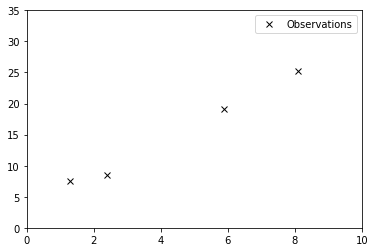

In [26]:
x = np.asarray([1.3, 2.4, 5.9, 8.1])
y = np.asarray([7.5, 8.5, 19.1, 25.2])

# Plot observations
fig, ax = plt.subplots()
ax.plot(x, y, 'kx', label="Observations")
decorate(ax)

We will try to define a linear model for the observations. Hence, we assume a linear relationship between $x$ and $y$ such that
$$y = w_0\cdot x + w_1$$
for unknown parameters $w_0$ and $w_1$.

In our intial try we use two guesses for these parameters:

In [32]:
# Guess 1
w0_1 = 4.1
w1_1 = 2.7
w1 = 4.1
b1 = 2.7

# Guess 2
w0_2 = 0.7
w1_2 = 3.4
w2 = 0.7
b2 = 3.4

Draw the line corresponding to each parameter guess.

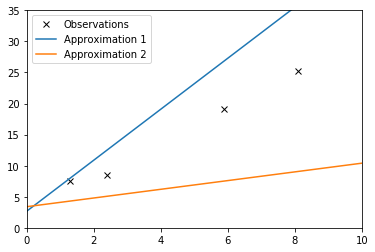

In [44]:
x_ = np.linspace(0, 10)
line1 = w0_1*x_ + w1_1
line2 = w0_2*x_ + w1_2

fig, ax = plt.subplots()
ax.plot(x, y, 'kx', label="Observations")
ax.plot(x_, line1, label="Approximation 1")
ax.plot(x_, line2, label="Approximation 2")
decorate(ax)

The mean squared loss is defined as
$$
\frac{1}{N}\sum_{i=1}^N(y_i-w_0\cdot x_i - w_1)^2
$$

Calculate the mean squared loss for each parameter guess.

In [68]:
# That's how kids do it
#sqerr1 = np.sum(np.power([y[i] - w1*x[i] - b1 for i in range(len(x))], 2))/len(x)
#sqerr2 = np.sum(np.power([y[i] - w2*x[i] - b2 for i in range(len(x))], 2))/len(x)

sqerr1 = np.sum((y -w1*x -b1)**2)/len(x)
sqerr2 = np.sum((y -w2*x -b2)**2)/len(x)

print("Squared loss 1:", sqerr1)
print("Squared loss 2:", sqerr2)

Squared loss 1: 47.99767499999995
Squared loss 2: 103.97857500000003


The closed-form solution for this particular loss function is given by
$$
w_1 = \frac{\overline{xy} - \overline{x}\overline{y}}{\overline{x^2}-\overline{x}^2},\qquad
w_0 = \overline{y}-w_1\overline{x}
$$
See lecture notes for details.

Find the solution w.r.t. the given observation using these equations.

In [51]:
x_bar = np.sum(x)/len(x)
y_bar = np.sum(y)/len(x)
xx_bar = np.sum(x**2)/len(x)
xy_bar = np.sum(x*y)/len(x)

w_opt = (xy_bar - x_bar*y_bar) / (xx_bar - x_bar**2)
b_opt = y_bar - w_opt*x_bar

Calculate mean squared loss for the new parameters and verify that it is smaller than the previous losses.

In [70]:
sqerr_opt = np.sum((y -w_opt*x -b_opt)**2)/len(x)

print("Optimal squared loss", sqerr_opt)

Optimal squared loss 0.502256959133598


Plot the line corresponding to the optimal solution.

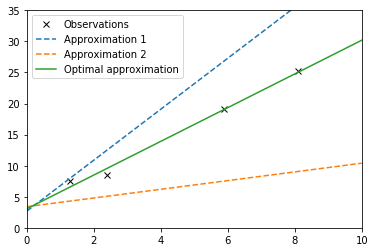

In [71]:
line_opt = w_opt*x_ + b_opt

fig, ax = plt.subplots()
ax.plot(x, y, 'kx', label="Observations")
ax.plot(x_, line1, '--', label="Approximation 1")
ax.plot(x_, line2, '--', label="Approximation 2")
ax.plot(x_, line_opt, label="Optimal approximation")
decorate(ax)